# Demo for the DoWhy causal API
We show a simple example of adding a causal extension to any dataframe. 

In [1]:
import os, sys
sys.path.append(os.path.abspath("../../"))

In [2]:
import dowhy.datasets
import dowhy.api

import numpy as np
import pandas as pd

from statsmodels.api import OLS

In [3]:
data = dowhy.datasets.linear_dataset(beta=5,
        num_common_causes=1,
        num_instruments = 0,
        num_samples=1000,
        treatment_is_binary=True)
df = data['df']
df['y'] = df['y'] + np.random.normal(size=len(df)) # Adding noise to data. Without noise, the variance in Y|X, Z is zero, and mcmc fails.
data['dot_graph'] = 'digraph { v ->y;X0-> v;X0-> y;}'

In [4]:
# data['df'] is just a regular pandas.DataFrame
df.causal.do(x='v',
                     variable_types={'v': 'b', 'y': 'c', 'X0': 'c'},
                     outcome='y',
                     common_causes=['X0']).groupby('v').mean().plot(y='y', kind='bar')

INFO:dowhy.do_why:Model to find the causal effect of treatment ['v'] on outcome ['y']
/home/amit/python-virtual-envs/env/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['U', 'X0']


WARN: Do you want to continue by ignoring these unobserved confounders? [y/n] y


INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]
INFO:dowhy.do_sampler:Using WeightingSampler for do sampling.
INFO:dowhy.do_sampler:Caution: do samplers assume iid data.


INFO:dowhy.do_why:Model to find the causal effect of treatment ['v'] on outcome ['y']
INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['U', 'X0']
INFO:dowhy.causal_identifier:Continuing by ignoring these unobserved confounders because proceed_when_unidentifiable flag is True.
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]
INFO:dowhy.do_sampler:Using WeightingSampler for do sampling.
INFO:dowhy.do_sampler:Caution: do samplers assume iid data.


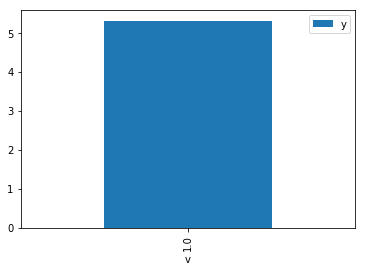

In [5]:
df.causal.do(x={'v': 1}, 
              variable_types={'v': 'b', 'y': 'c', 'X0': 'c'}, 
              outcome='y',
              method='weighting', 
              common_causes=['X0'],
              proceed_when_unidentifiable=True).groupby('v').mean().plot(y='y', kind='bar')

In [6]:
cdf_1 = df.causal.do(x={'v': 1}, 
              variable_types={'v': 'b', 'y': 'c', 'X0': 'c'}, 
              outcome='y', 
              dot_graph=data['dot_graph'],
              proceed_when_unidentifiable=True)

cdf_0 = df.causal.do(x={'v': 0}, 
              variable_types={'v': 'b', 'y': 'c', 'X0': 'c'}, 
              outcome='y', 
              dot_graph=data['dot_graph'],
              proceed_when_unidentifiable=True)

INFO:dowhy.do_why:Model to find the causal effect of treatment ['v'] on outcome ['y']
INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['U', 'X0']
INFO:dowhy.causal_identifier:Continuing by ignoring these unobserved confounders because proceed_when_unidentifiable flag is True.
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]
INFO:dowhy.do_sampler:Using WeightingSampler for do sampling.
INFO:dowhy.do_sampler:Caution: do samplers assume iid data.
INFO:dowhy.do_why:Model to find the causal effect of treatment ['v'] on outcome ['y']
INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['U', 'X0']
INFO:dowhy.causal_identifier:Continuing by ignoring these unobserved confounders because proceed_when_unidentifiable flag is True.
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]
INFO:dowhy.do_sampler:Using WeightingSampler for do sampling.
INFO:dowhy.do_sampler:Caution: do samplers assume iid data.


In [7]:
cdf_0

,X0,v,y,propensity_score,weight
0,-0.286784,0.0,1.847649,0.288990,3.460330
1,0.372167,0.0,0.371452,0.093811,10.659765
2,0.094503,0.0,-1.128125,0.155556,6.428533
3,1.064739,0.0,0.554691,0.024000,41.667267
4,-0.534108,0.0,-0.047211,0.404448,2.472506
5,-1.572716,0.0,-2.481347,0.854296,1.170555
6,0.512110,0.0,1.767092,0.071862,13.915472
7,0.318101,0.0,0.982595,0.103795,9.634389
8,-2.195278,0.0,-1.787518,0.955248,1.046848
9,-0.129979,0.0,-0.119553,0.226926,4.406719


In [8]:
cdf_1

,X0,v,y,propensity_score,weight
0,0.327129,1.0,4.545650,0.897935,1.113666
1,0.163933,1.0,4.222913,0.862448,1.159490
2,1.226973,1.0,6.363237,0.982743,1.017560
3,4.551753,1.0,10.376814,0.999982,1.000018
4,0.078493,1.0,4.443852,0.840028,1.190436
5,1.148025,1.0,5.570182,0.979733,1.020686
6,0.808316,1.0,4.942534,0.959814,1.041869
7,-1.265314,1.0,3.138681,0.244037,4.097744
8,0.303415,1.0,3.503589,0.893335,1.119401
9,1.791762,1.0,6.601023,0.994592,1.005438


## Comparing the estimate to Linear Regression
First, estimating the effect using the causal data frame, and the 95% confidence interval.

In [9]:
(cdf_1['y'] - cdf_0['y']).mean()

In [10]:
1.96*(cdf_1['y'] - cdf_0['y']).std() / np.sqrt(len(df))

Comparing to the estimate from OLS.

In [11]:
model = OLS(df['y'], df[['X0', 'v']])
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                          1.304e+04
Date:                Sun, 29 Sep 2019   Prob (F-statistic):                        0.00
Time:                        12:06:10   Log-Likelihood:                         -1416.4
No. Observations:                1000   AIC:                                      2837.
Df Residuals:                     998   BIC:                                      2847.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X0             1.0898      0.034     31.791      0.000       1.023       1.157
v              5.0354      0.041    122.778      0.000       4.955       5.116
==============================================================================
Omnibus:                        4.607   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.100   Jarque-Bera (JB):                3.635
Skew:                           0.001   Prob(JB):                        0.162
Kurtosis:                       2.705   Cond. No.                         1.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""